# Exploratory Data Analysis For "Penguines" Dataset:

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Preprocessing:

In [133]:
df = sns.load_dataset('penguins')

In [134]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [135]:
df.shape

(344, 7)

In [136]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [137]:
df.dropna(inplace = True)

In [138]:
df.duplicated().sum()

0

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [140]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


# Analysis of the Dataset:

# Q1) What are the most common penguin species in the dataset?

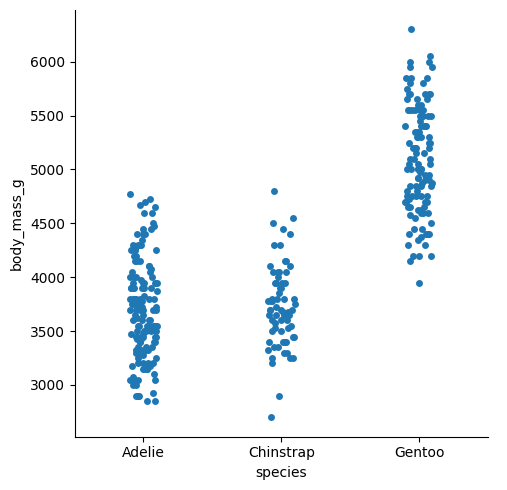

In [141]:
sns.catplot(data= df, x= "species", y= "body_mass_g") 

In [142]:
m= 0
for i in df["species"]:
    if (i == 'Adelie'):
        m= m+1
print(m)

146


In [143]:
m= 0
for i in df["species"]:
    if (i == 'Gentoo'):
        m= m+1
print(m)

119


In [144]:
m= 0
for i in df["species"]:
    if (i == 'Chinstrap'):
        m= m+1
print(m)

68


Sol- Adelie, Gentoo, Chinstrap are the species in the dataset.

# Q2) How are the species distributed based on their physical characteristics (e.g., bill length, bill depth, flipper length)?


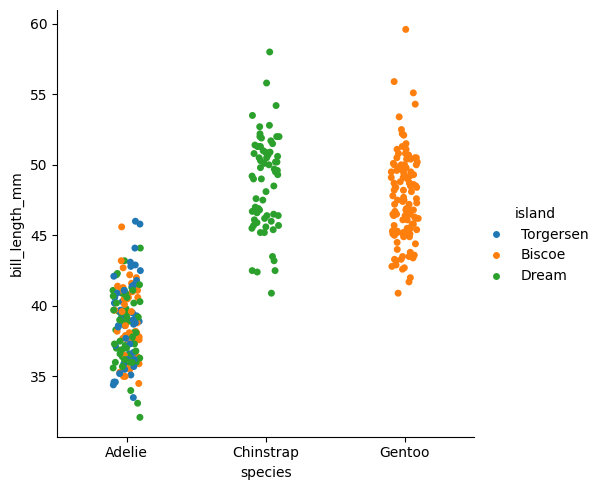

In [145]:
sns.catplot(data= df, x= "species", y= "bill_length_mm", hue= "island")

Bill_length- Average bill length of Adelie is lower that that of Gentoo and Chinstrap.

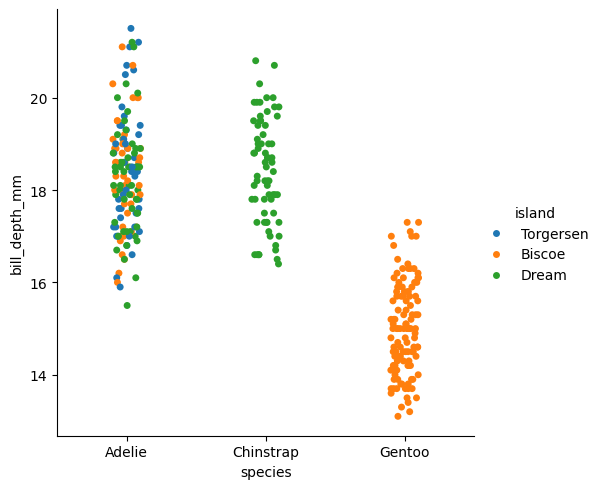

In [146]:
sns.catplot(data= df, x= "species", y= "bill_depth_mm", hue= "island")

Bill_depth- Average bill depth of Gentoo species is lower than that of Adelie and Chinstrap.

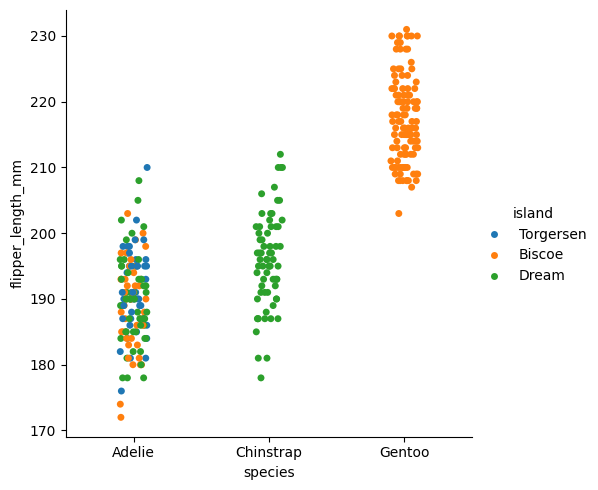

In [147]:
sns.catplot(data= df, x= "species", y= "flipper_length_mm", hue= "island")

flipper_length- average flipper length of Gentoo Species is greater than that of Adelie and Chinstrap.

# Q3) Is there a correlation between bill length and bill depth?

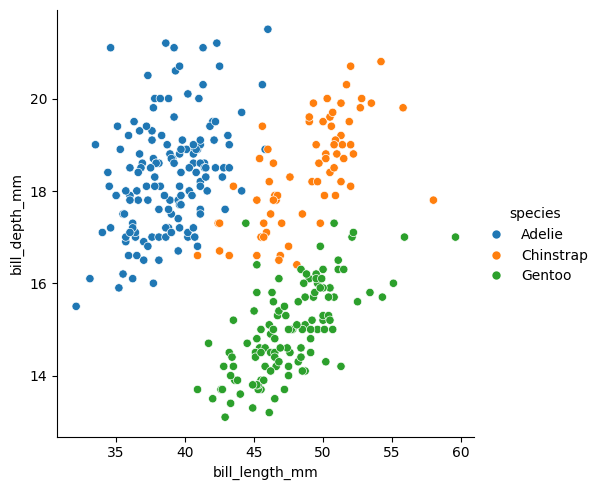

In [148]:
sns.relplot(data= df, x="bill_length_mm", y="bill_depth_mm",hue= "species")

Sol- If bill_depth is greater for a species than bill_lenght is lower, vice-versa.

# Q4) Which species has the largest average flipper length?

In [149]:
a = df.loc[df["species"] == "Gentoo", "flipper_length_mm"]
a.describe()

count    119.000000
mean     217.235294
std        6.585431
min      203.000000
25%      212.000000
50%      216.000000
75%      221.500000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [150]:
b = df.loc[df["species"] == "Adelie", "flipper_length_mm"]
b.describe()

count    146.000000
mean     190.102740
std        6.521825
min      172.000000
25%      186.000000
50%      190.000000
75%      195.000000
max      210.000000
Name: flipper_length_mm, dtype: float64

In [151]:
c = df.loc[df["species"] == "Chinstrap", "flipper_length_mm"]
c.describe()

count     68.000000
mean     195.823529
std        7.131894
min      178.000000
25%      191.000000
50%      196.000000
75%      201.000000
max      212.000000
Name: flipper_length_mm, dtype: float64

Sol- Average flipper lenght for Gentoo Series is maximum.

# Q5) Do male and female penguins differ significantly in their body mass or measurements?

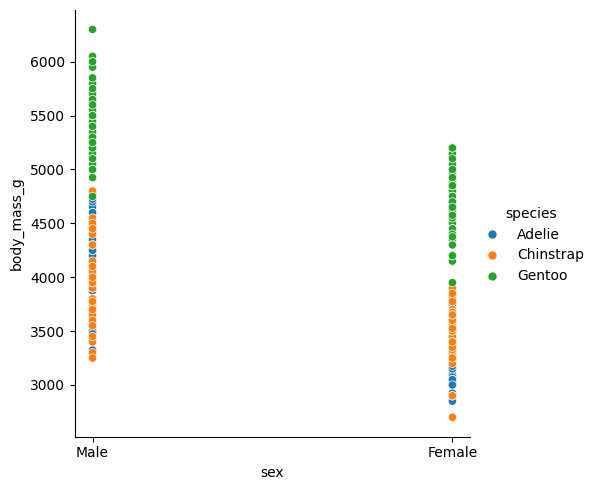

In [152]:
sns.relplot(data= df, x= "sex", y= "body_mass_g", hue= "species")

Sol- Males have significantly Greater Body mass than females.

# Q6) How are penguin species distributed across islands in the dataset (e.g., Dream, Torgersen, Biscoe)?

# Q7) Are certain species more abundant on specific islands?

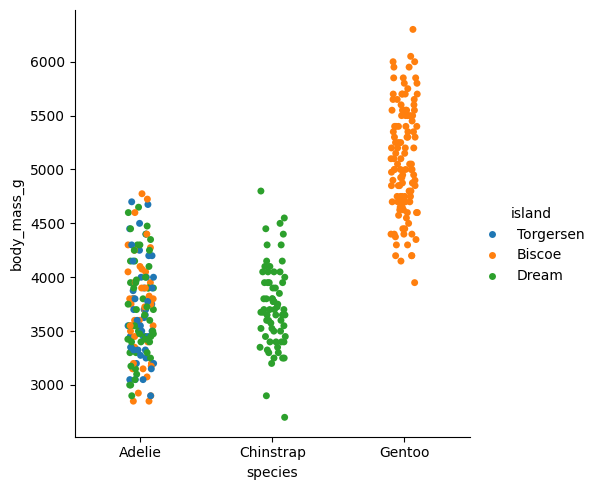

In [153]:
sns.catplot(data= df, x= "species", y= "body_mass_g", hue= "island") 

Sol- Adelie species is present in all three islands, Chinstrap only in Dream and Gentoo only is Biscoe. 

# Q8) What are the differences in body mass or bill measurements between male and female penguins within a species?

# Q9) Are males or females heavier on average?

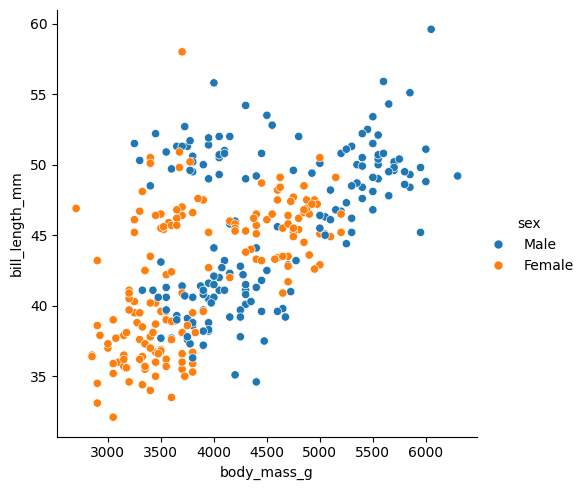

In [154]:
sns.relplot(data= df, x="body_mass_g", y="bill_length_mm", hue="sex")

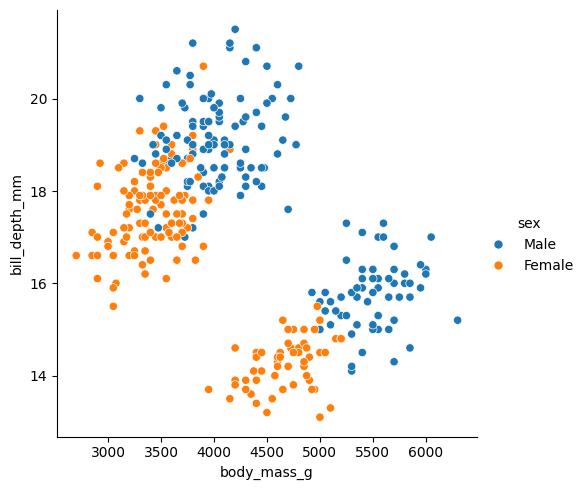

In [155]:
sns.relplot(data= df, x="body_mass_g", y="bill_depth_mm", hue="sex")

Sol- bill length, bill depth and mass of females are comparatively low than males.

# Q10) How do penguin species compare in terms of average body mass or bill dimensions?


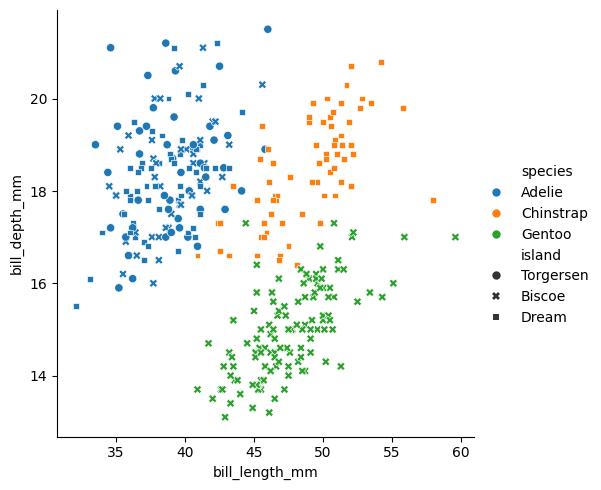

In [156]:
sns.relplot(data= df , x="bill_length_mm", y="bill_depth_mm", hue="species", style = "island")

Sol- gento - bill length greater, bill depth lower. adelie- bill length lower, bill depth greater. chinstrap- both are almost similar.

# Q11) Which species has the greatest variation in flipper length?

# Q12) Is there a relationship between body mass and flipper length?

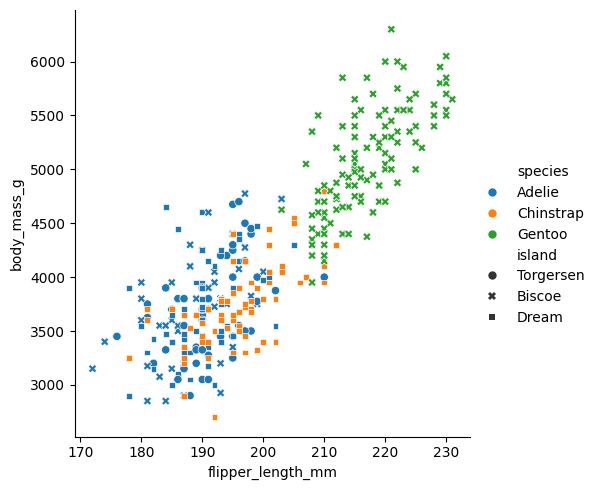

In [157]:
sns.relplot(data= df, x="flipper_length_mm",y="body_mass_g",hue="species",style = "island",kind="scatter")

Sol- Flipper Length of Gentoo is unusually high.

Body mass and flipper length seem proportional to each other.

# Q13) Are there any unusual penguin measurements (e.g., very large or small values)? How do outliers affect species classification?

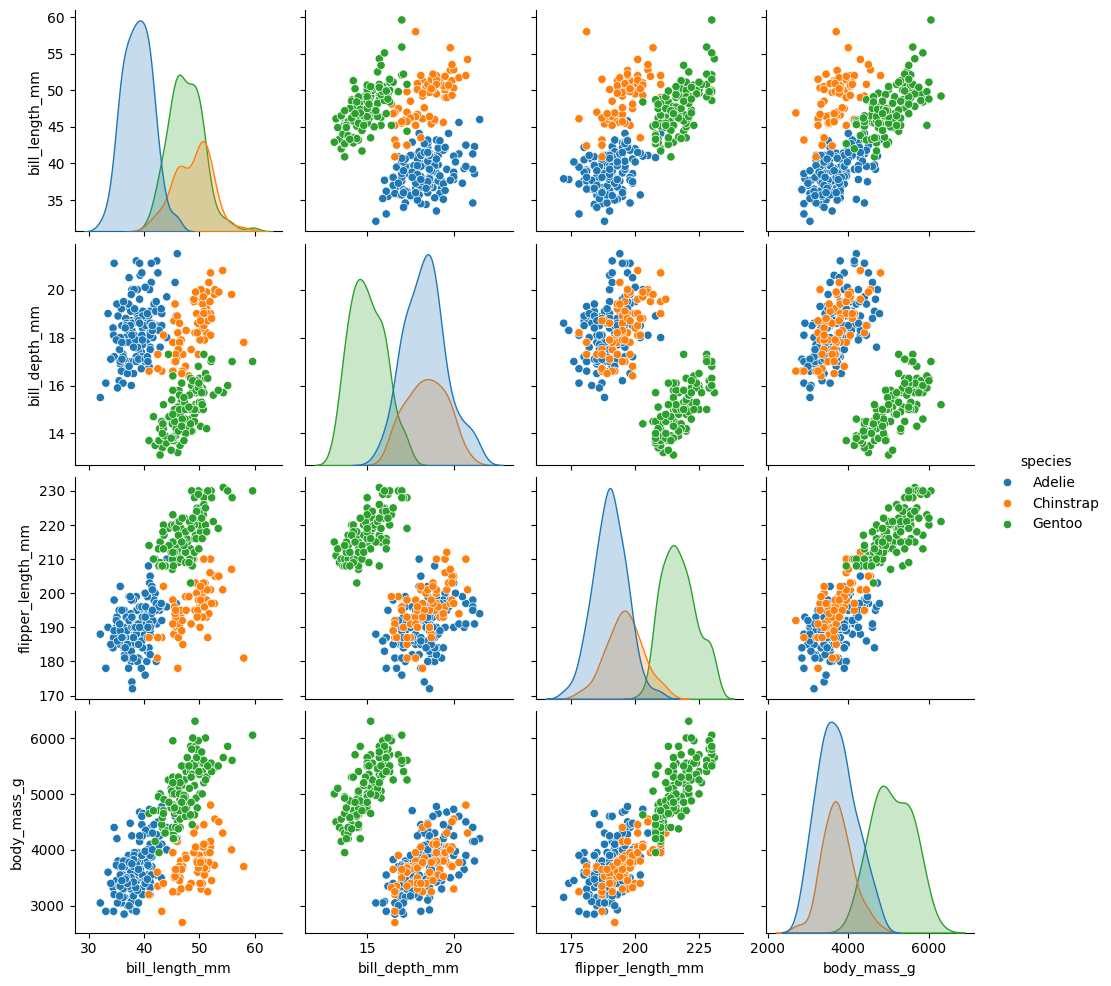

In [158]:
sns.pairplot(df, hue= "species")

# Q14) Can we predict a penguin’s species based on their physical measurements?

In [165]:
ya= df["species"]
y= pd.get_dummies(ya,columns=['species'],drop_first = True)
x = pd.get_dummies(df, columns= ["island"],drop_first =True)
m = x.drop(columns =["species","flipper_length_mm", "body_mass_g","sex"])   

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(m, y, test_size = 0.2 , random_state= 42)

In [167]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit( x_train, y_train)

DecisionTreeClassifier()

In [168]:
y_pred = clf.predict(x_test)    

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9701492537313433

# Q15)Make a Website for the Prediction of the Species of Penguines

In [170]:
import gradio as gr

/home/deepak/myenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [174]:
# Function for prediction
def predict_species(bill_length_mm, bill_depth_mm, island_Dream, island_Torgersen):
    # Prepare input features
    input_data = pd.DataFrame({
        'bill_length_mm': [bill_length_mm],
        'bill_depth_mm': [bill_depth_mm],
        'island_Dream': [island_Dream],
        'island_Torgersen': [island_Torgersen]
    })

    # Predict
    prediction = clf.predict(input_data)
    species_map = {0: "Adelie", 1: "Gentoo", 2: "Chinstrap"}
    return species_map[np.argmax(prediction)]


In [175]:
# Create Gradio interface
interface = gr.Interface(
    fn=predict_species,
    inputs=[
        gr.Number(label="Bill Length (mm)"),
        gr.Number(label="Bill Depth (mm)"),
        gr.Checkbox(label="Island: Dream"),
        gr.Checkbox(label="Island: Torgersen")
    ],
    outputs=gr.Textbox(label="Predicted Species"),
    title="Penguin Species Predictor",
    description="Enter the penguin's features to predict its species."
)

# Launch the app
interface.launch()

* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
